In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from pylab import rcParams

In [2]:
# NOTE There is a discrepancy over this dataset and the one cited at:http://lib.stat.cmu.edu/datasets/boston
#     - There is one more column on the above mentioned
#     - This excersise follows what is being described via 
#         --> scikit-learn (https://h1ros.github.io/posts/loading-scikit-learns-boston-housing-dataset/)
    
#     :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

#     :Attribute Information (in order):
#         - CRIM     per capita crime rate by town
#         - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#         - INDUS    proportion of non-retail business acres per town
#         - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#         - NOX      nitric oxides concentration (parts per 10 million)
#         - RM       average number of rooms per dwelling
#         - AGE      proportion of owner-occupied units built prior to 1940
#         - DIS      weighted distances to five Boston employment centres
#         - RAD      index of accessibility to radial highways
#         - TAX      full-value property-tax rate per $10,000
#         - PTRATIO  pupil-teacher ratio by town
#         - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#         - LSTAT    % lower status of the population
#         - MEDV     Median value of owner-occupied homes in $1000's

# ASSUMPTIONS:
    
#     1. Y1 = Predict MEDV field based on CRIM (Single attribute)
#     2. Y2 = Predict MEDV field based on all predictors/dimensions (Multi-attribute)

In [3]:

%matplotlib inline
rcParams['figure.figsize'] = 14, 7

In [4]:
boston = load_boston()

In [5]:
data = pd.DataFrame(boston.data)

In [6]:
data.shape

(506, 13)

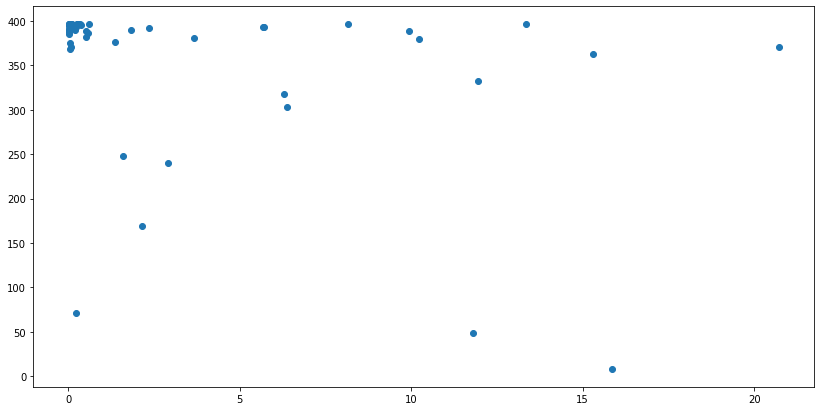

In [7]:
data = data.sample(n=50, random_state=1)
plt.scatter(data[0], data[11])

In [8]:

dt_reg = DecisionTreeRegressor(min_samples_split=5)


In [9]:
x = data[0].values.reshape(-1,1)
y = data[11]
dt_reg.fit(x,y)

DecisionTreeRegressor(min_samples_split=5)

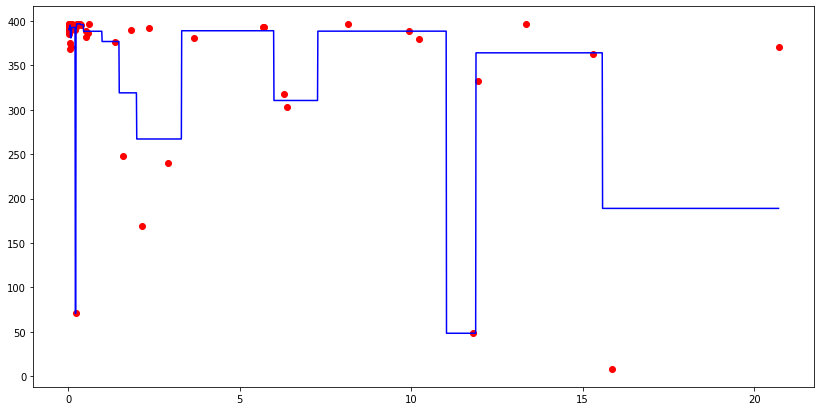

In [10]:
x_grid = np.arange(min(x), max(x), 0.01)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x, y, color="red")
plt.plot(x_grid, dt_reg.predict(x_grid), color="blue")
plt.show()

In [11]:
x = data
x = x.drop([11],axis=1)

In [12]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,12
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,7.53
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,7.18
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,18.80
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,8.10
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,10.19


In [13]:
dt_reg.fit(x,y)

DecisionTreeRegressor(min_samples_split=5)

[Text(1101.3157894736842, 1310.4642857142858, '12 <= 21.795\nmse = 8206.707\nsamples = 50\nvalue = 353.891'),
 Text(954.4736842105262, 1213.392857142857, '10 <= 20.55\nmse = 4170.208\nsamples = 44\nvalue = 368.426'),
 Text(881.0526315789473, 1116.3214285714287, '4 <= 0.82\nmse = 1906.682\nsamples = 40\nvalue = 378.228'),
 Text(807.6315789473684, 1019.25, '2 <= 18.84\nmse = 807.286\nsamples = 39\nvalue = 383.586'),
 Text(734.2105263157895, 922.1785714285714, '6 <= 96.3\nmse = 280.177\nsamples = 37\nvalue = 387.3'),
 Text(513.9473684210526, 825.1071428571429, '9 <= 401.0\nmse = 59.572\nsamples = 32\nvalue = 391.09'),
 Text(293.6842105263158, 728.0357142857143, '12 <= 4.65\nmse = 18.415\nsamples = 24\nvalue = 393.557'),
 Text(220.26315789473682, 630.9642857142858, 'mse = 12.822\nsamples = 3\nvalue = 386.84'),
 Text(367.10526315789474, 630.9642857142858, '7 <= 7.283\nmse = 11.847\nsamples = 21\nvalue = 394.517'),
 Text(293.6842105263158, 533.8928571428571, '5 <= 7.333\nmse = 6.857\nsamples

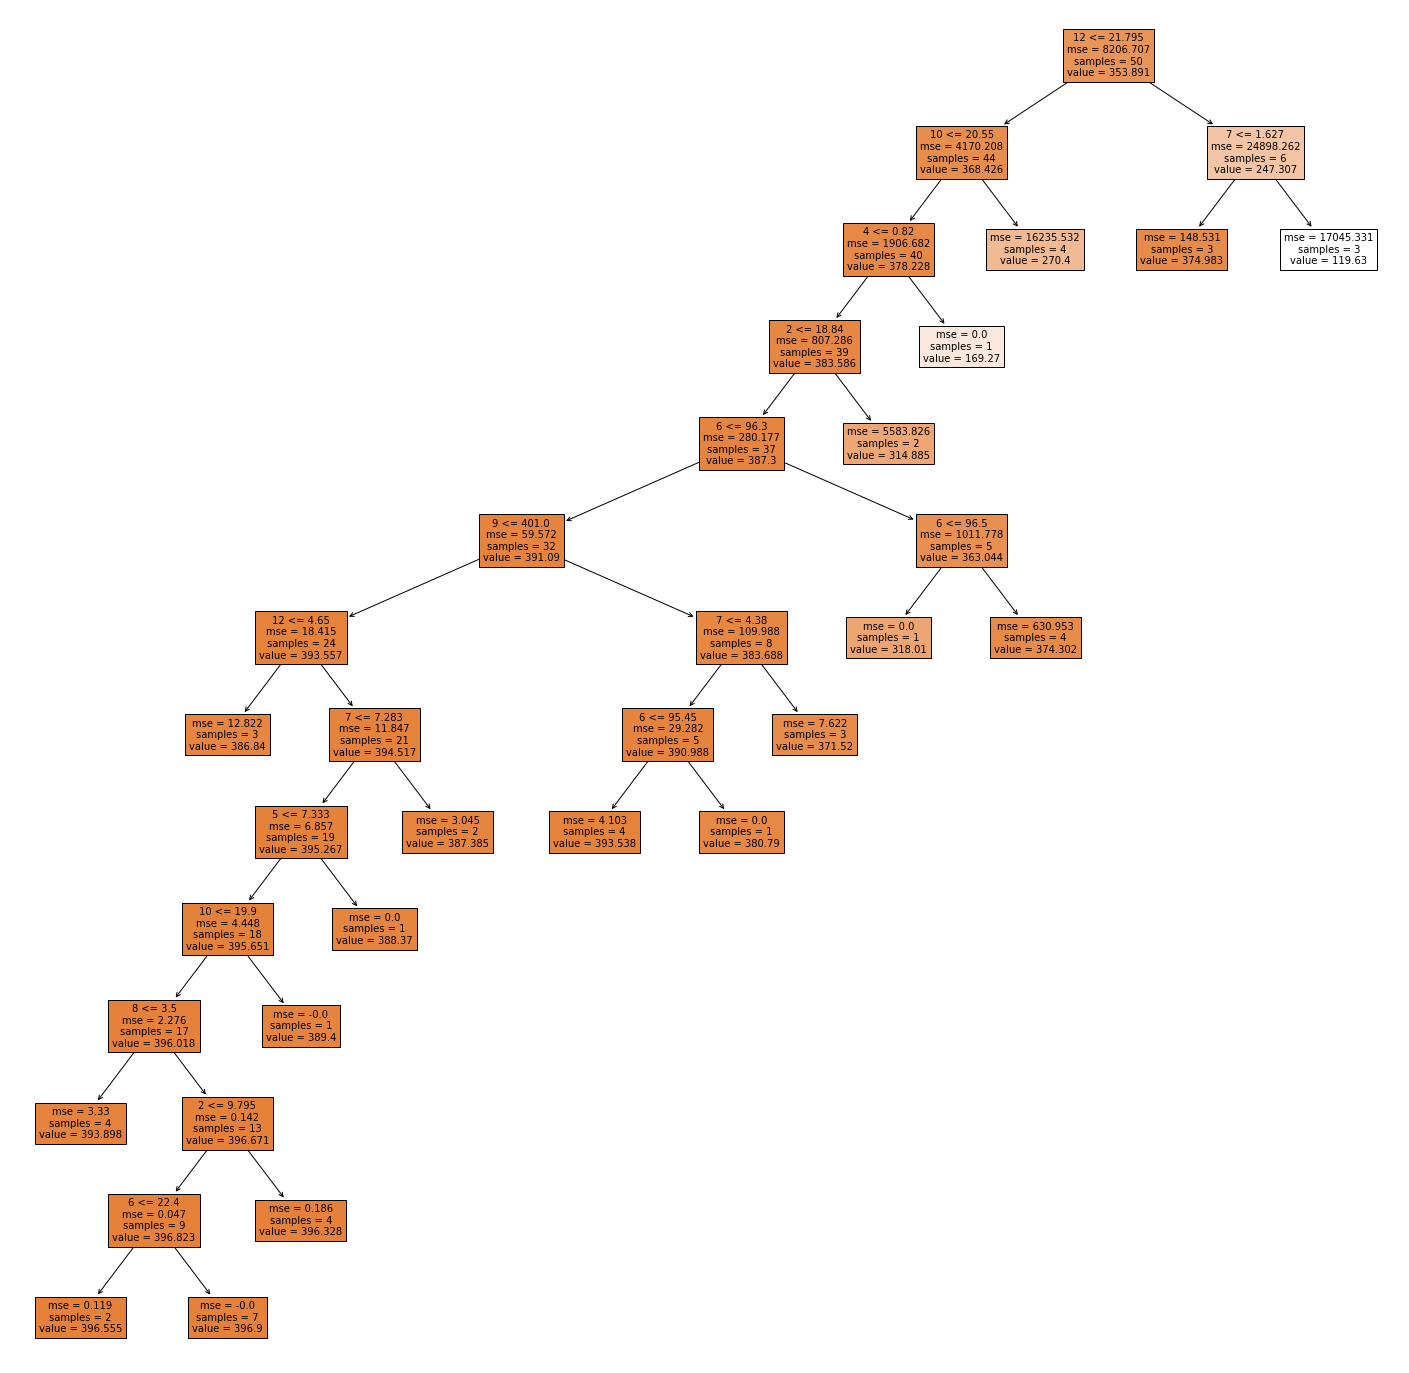

In [14]:
plt.figure(figsize=(25,25))  # set plot size (denoted in inches)
tree.plot_tree(dt_reg, fontsize=10, filled=True, feature_names=x.columns)  